<a href="https://colab.research.google.com/github/kyrawrrr/SoftwareTechnology-CapstoneProject/blob/main/u3269444_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Importing "drive"module from the "google.colab' package and mounting google drive in the colab environment.

In [2]:
%cd /content/drive/MyDrive/ColabNotebooks/
!1s

/content/drive/MyDrive/ColabNotebooks
/bin/bash: line 1: 1s: command not found


Changing the current working directory to content/drive/MyDrive/u3269444_Capstone_Project

## **Introduction and Purposes**


---


This project and the following analysis is based on the dataset of TESLA Stock Price Prediction built by A.Mohan Kumar, available from Kaggle repository (https://www.kaggle.com/datasets/amohankumar/tesla-stock-price-prediction-dataset)
   

*   The dataset includes the stock price details of TESLA from the 29th of September, 2021 to the 29th of September, 2022.

*   This project aims to create a machine learning model which can predict the future trend of TESLA stock price according to the characteristics of data.

*   To resolve this issue, I will take a systematic approach, developing a data analysis and prediction model step by step. This model will implement various Python packages, modules, and classes (including machine learning and regression algorithms) to achieve the desired outcome.

## **Step 1: Reading Data by Using Python**

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset
import pandas as pd
import numpy as np
TeslaData=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/TESLA.csv', encoding='latin')
print('Shape before deleting duplicate values:', TeslaData.shape)

# Removing duplicate rows
TeslaData=TeslaData.drop_duplicates()
print('Shape After deleting duplicate values:', TeslaData.shape)

# Start observing the Quantitative/Qualitative variables
TeslaData.head(10)


Shape before deleting duplicate values: (253, 7)
Shape After deleting duplicate values: (253, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
5,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400
6,2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400
7,2021-10-08,265.403320,265.459991,260.303345,261.829987,261.829987,50215800
8,2021-10-11,262.549988,267.079987,261.833344,263.980011,263.980011,42600900
9,2021-10-12,266.976654,270.773346,265.523346,268.573334,268.573334,66060000


# **Key observations of the Data Description in Step 1**
---


This dataset includes 253 valid data of the prices of TESLA stock from the 29th of September 2021 to 29th of September 2022.

There are 7 attributes contained in the file. They are outlined and explained below.

Date -- The specific date when the stock market data was recorded.

Open -- The price of a stock when the market opens for trading on a particular day.

High -- The highest price at which the stock traded during the trading day.

Low -- The lowest price at which the stock traded during the trading day.

Close -- The price of the stock at the end of the trading day.

Adj Close -- The closing price of the stock adjusted for any corporate actions, such as dividends, stock splits, or mergers, that may have occurred.

Volume -- The total number of shares of the stock that were traded during the trading day.

## **Step 2 : Define the Problem Statement**

---

* Creating a prediction model to predict the volume of shares of TESLA stock market.
* Target Variable: Volume
* Predictors: Date, Open, High, Low, Close, Adj Close, Volume.

## **Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.**

---

* Based on the given problem description, a supervised Machine Learning (ML) Regression Model will be developed. The variable that it aims to predict is Volume, which variates continuously.

## **Step 4: Observe the Class Distribution**

---



<Axes: >

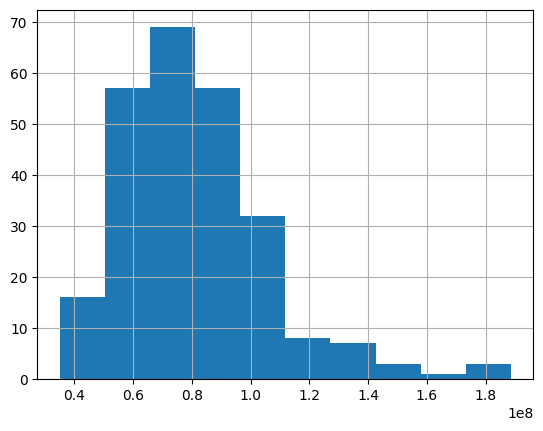

In [4]:
%matplotlib inline
# Creating histogram as the target variable is a Continuous variable
# Accesses the 'Volume' column of the TeslaData and calls the hist() function
TeslaData['Volume'].hist()

# **Observations from Step 4**
---

* The data distribution of the target variable Volume is positively skewed. The majority of the data points are concentrated at the beginning of the scale, with a long tail extending towards the higher values.

* This might lead to biased predictions, violations of assumptions, and sensitivity to outliers.

* It could cause a disproportionate influence of outliers and make it challenging for the model to accurately capture the underlying patterns in the data.

* Therefore, it is essential to address this skewness through techniques such as data transformation to improve the model's predictive capabilities.

## **Step 5: Basic Exploratory Data Analysis**

---

In this step of data analysis, the overall dataset is assessed to understand its structure and contents. The primary focus is on examining the volume of data and categorizing the columns as Quantitative, Categorical, or Qualitative. This initial evaluation serves as the foundation for identifying columns that may need further analysis or rejection.


Each column undergoes careful scrutiny to determine its impact on the target variable, which, in this report, is the stock price of Tesla. Columns that do not significantly affect the target variable are promptly removed from consideration, while others are retained for further analysis.


To conduct basic exploratory analysis, four commands are employed:

- `head()`: Displays a few sample rows of the data to provide a glimpse of its structure.

- `info()`: Summarizes the information contained in the dataset, including data types and missing values.

- `describe()`: Provides descriptive statistical details of the data, such as mean, median, and quartiles.

- `nunique()`: Identifies the number of unique values in each column, helping determine whether a column is categorical or continuous.



In [5]:
# Observes the first few rows of the dataset
TeslaData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [6]:
# Observe the last few rows of the dataset
TeslaData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100


In [7]:
# Provides summarized information about dataset
TeslaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [8]:
# Provides the descriptive statistics
TeslaData.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,253,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
unique,253,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-09-29,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,NaN,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,NaN,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,NaN,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,NaN,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,NaN,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07


In [9]:
# Checks the number of unique values and and inspects the distinct values present in each column.
# Determines if the a column is categorical or continuous.
# If the count of unique values equals 253, the variable is considered categorical. Otherwise, it's classified as continuous.
TeslaData.nunique()

Date         253
Open         249
High         251
Low          251
Close        252
Adj Close    252
Volume       253
dtype: int64

## **Observations from Step 5**
---

Following the basic exploration outlined above, a simple data report will be presented, providing observations for each column.

This report serves as an instruction for subsequent analysis, guiding the direction of further examination. The columns selected at this stage represent a preliminary set, and additional scrutiny will be undertaken to compile a final list. This iterative process ensures a thorough understanding of the dataset's characteristics and facilitates informed decision-making in subsequent analytical steps.

* Date - Categorical. Selected.
* Open - Continuous. Selected.
* High - Continuous. Selected.
* Low - Continuous. Selected.
* Close - Continuous. Selected.
* Adj Close - Continuous. Selected.
* Volume - Continuous. Selected. (This is the Target Variable, which will be predicted by the proposed regression model.)

## **Step 7: Removing Unwanted columns**

---

* There are no qualitative columns in the data.
* Hence no column will be removed

## **Step 8: Visual Exploratory Data Analysis**

---

- Utilizing bar plots, the distribution of all Categorical Predictor variables in the dataset will be displayed.

- Categorical variables can be discerned by inspecting their unique values, which typically number around 253, fostering data grouping based on repetition.

- In the prior step of Basic Exploration Data Analysis, 'Date' and 'Volume' emerged as the identified categorical predictors in the dataset. To visualize the distribution of data for these categorical columns, bar charts will be employed.

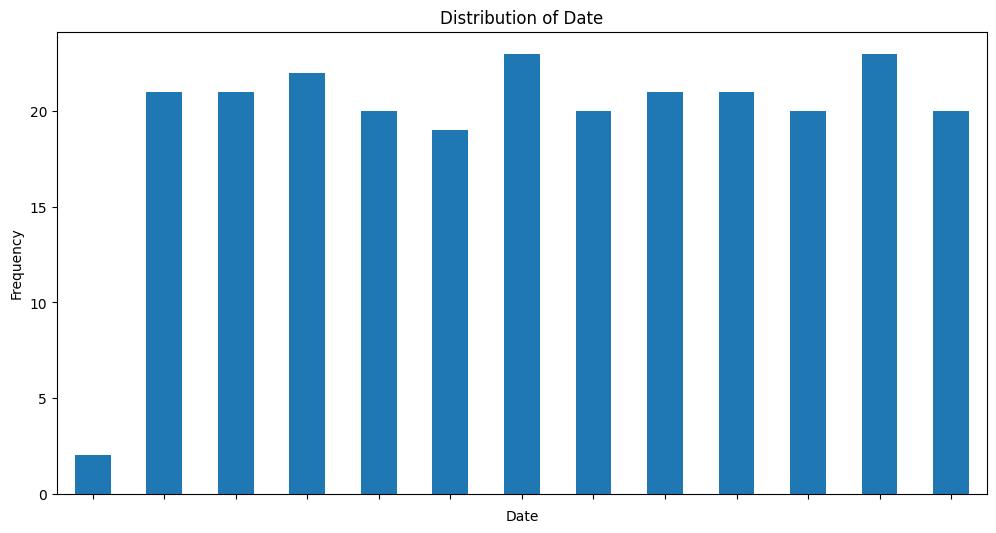

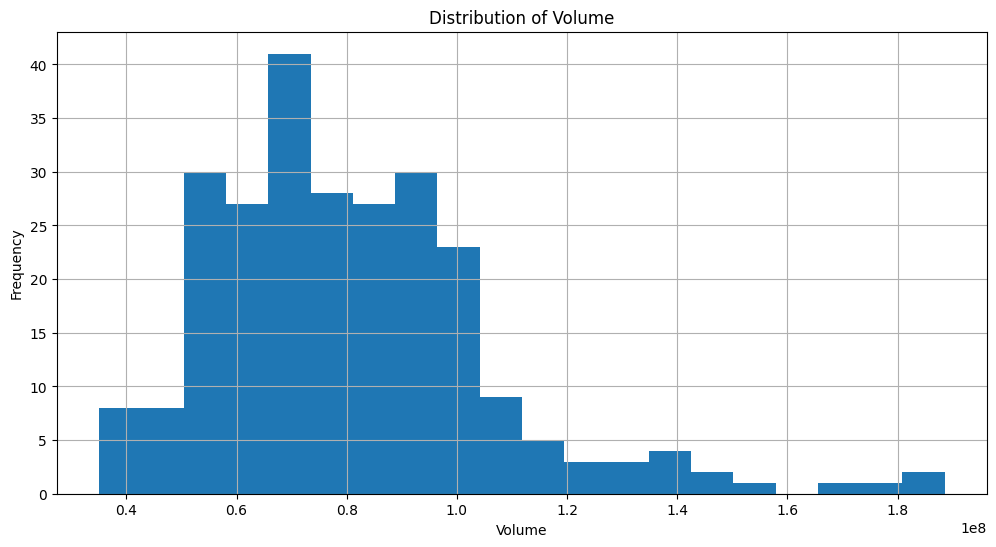

In [10]:
# Plotting multiple bar charts at once for categorical variables
import pandas as pd
import matplotlib.pyplot as plt

# Visualizing the distribution of the categorical variable 'Date'
TeslaData['Date'] = pd.to_datetime(TeslaData['Date'])

# Aggregate data into larger time intervals
date_counts = TeslaData.resample('M', on='Date').size()
plt.figure(figsize=(12, 6))
date_counts.plot(kind='bar')

plt.title('Distribution of Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([])
plt.show()

# Visualizing the distribution of the continuous variable 'Volume'
plt.figure(figsize=(12, 6))
plt.hist(TeslaData['Volume'], bins=20)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## **Observations from Step 8 - Visual Exploratory Data Analysis**
---

   - One bar chart exhibits a positively skewed distribution, indicating that one category has significantly higher frequency compared to others.

   - The other bar chart shows a low frequency for the first category and relatively higher frequencies for the rest.

   - Ideally, categories should have comparable frequencies for effective learning by ML/AI regression algorithms. However, the skewed distributions suggest that this may not be the case.

   - The presence of highly skewed distributions, where one category dominates, can hinder the effectiveness of ML model development. In one chart, one category dominates, while in the other, the first category has low frequency compared to the rest.

   - The hypothesis suggests that highly skewed columns may lack correlation with the target variable due to limited information.

   - Confirmation of this hypothesis through correlation analysis can guide decisions on whether to retain or discard such columns.
   
   - Columns exhibiting uncertain characteristics, such as highly skewed distributions, warrant further investigation to understand their impact on the dataset and ML model development.




## **Step 9: Visualizing the distribution of all the Continuous Predictor variables in the data using histograms**
---

* Based on the Basic Exploratory Data Analysis, there are six continuous predictor variables 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

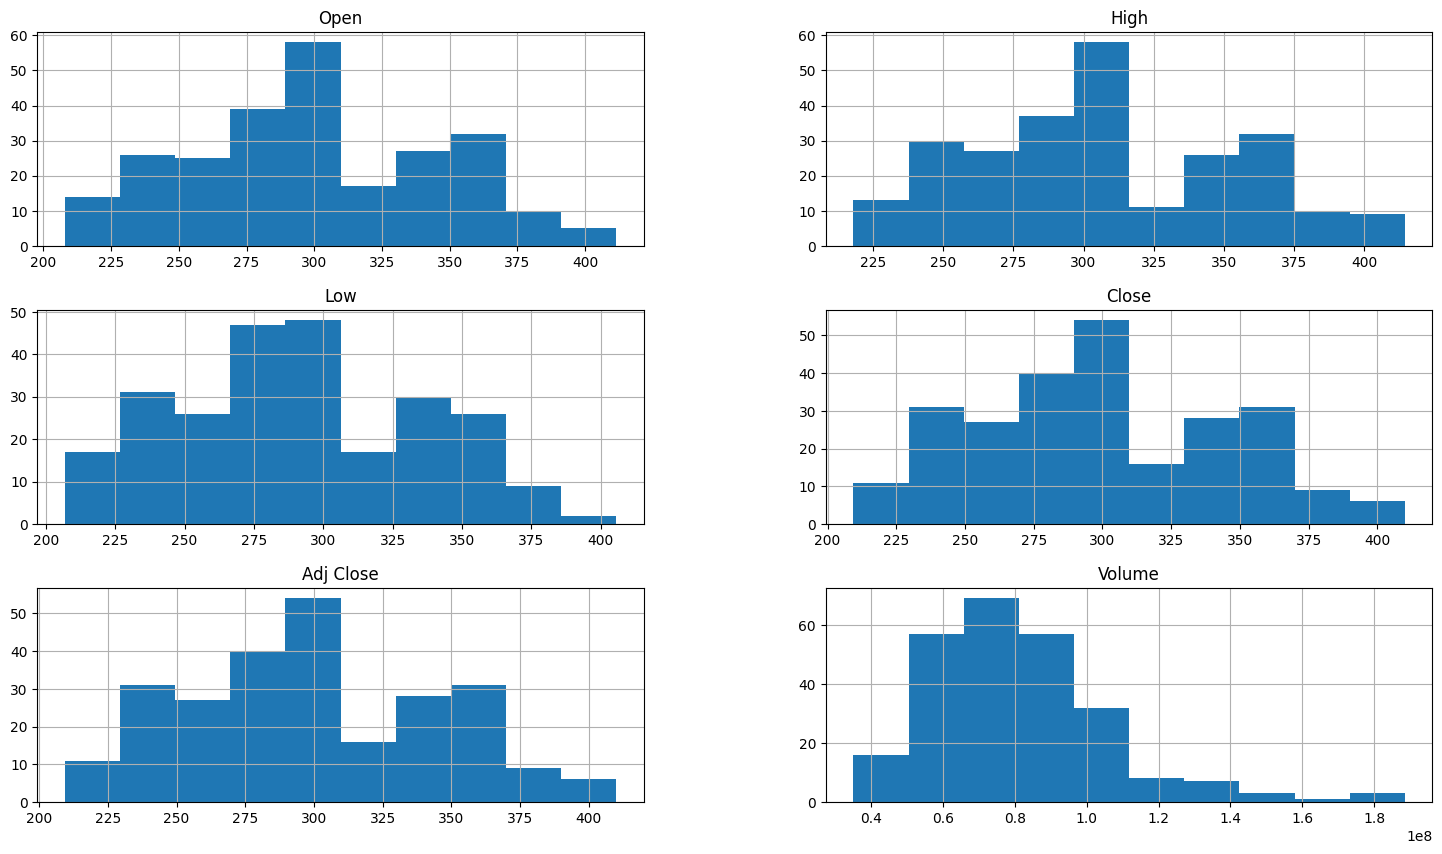

In [11]:
# Plotting histograms of multiple columns together
TeslaData.hist(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], figsize=(18,10))

## **Observations from Step 9**
---

- Each histogram visualizes the data distribution for a single continuous variable.

- The X-axis represents the range of values, while the Y-axis indicates the frequency of values within each range.

- In the histograms of 'Open', 'High', 'Low', 'Close', and 'Adj Close', the distribution closely resembles a bell curve. However, there consistently appears to be a lower column around 310 to 325, leading to a less than ideal distribution.

* Selected Continuous Variables:

* Open : Selected. The distribution is good.
* High : Selected. The distribution is good.
* Low : Selected. The distribution is good.
* Close : Selected. The distribution is good.
* Adj Close : Selected. The distribution is good.
* Volume : Selected. The distribution is good.


## **Step 10: Outlier Analysis**

---

- Outliers are the extreme values in the dataset, significantly different from the majority of values.

- It's necessary to address outliers individually for each column or data attribute, as the treatment approach varies slightly for each. Outliers can skew machine learning model development, as the algorithm may prioritize fitting the extreme values rather than the bulk of the data.

- In the current dataset, no extreme values are evident in each graph, eliminating the need to remove any columns.

## Step 11:Visualising Data Distribution after outlier removal

## **Observation from Step 11**
---
* The distribution has improved after the outlier treatment.


## **Step 12: Missing Values Analysis**
---

- Missing values in each column are handled individually.

- If a column has over 30% missing data, addressing them becomes impractical, leading to significant information loss, and consequently, the column is usually discarded.

- Below are various options for handling missing values:

  - Removal of rows containing missing values, especially if only a few records are affected.
  
  - Imputation of missing values with the median for continuous variables.
  
  - Imputation of missing values with the mode for categorical variables.
  
  - Interpolation of values based on neighboring data points.
  
  - Interpolation of values according to established business logic.

In [12]:
# Finding how many missing values are there for each column
TeslaData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## **Observations from Step 12: Missing Value Analysis**
---

* The data contains no missing values.
* Therefore, there is no need to remove any data rows.


## **Step 13: Feature Selection (Attribute Selection)**

---

* The following parts will select the most relevant columns (features) that correlate with the Target variable.
* This selection process can be achieved through direct measurement of correlation values, ANOVA analysis, or Chi-Square tests.
* However, it's beneficial to visually assess the relationship between the Target variable/class variable and each predictor (feature) to gain a deeper understanding of the data.

* Below are techniques used for visualizing relationships between variables and statistically measuring their strength:

**Visual Exploration of Relationship between Variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous ---- Box Plot
* Categorical Vs Categorical ---- Grouped Bar Plots

**Statistical Measurement of Relationship Strength between Variables**
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous ---- ANOVA test
* Categorical Vs Categorical ---- Chi-Square test

* In the case of this dataset, the Target variable is Continuous, thus requiring attention to the following two scenarios:

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor


## **Relationship exploration: Continuous Vs Continuous -- Scatter Charts**
---
* When both the Target variable and the predictor are continuous, it's available depict their relationship through a scatter plot and quantify the strength of their association using Pearson's correlation coefficient.

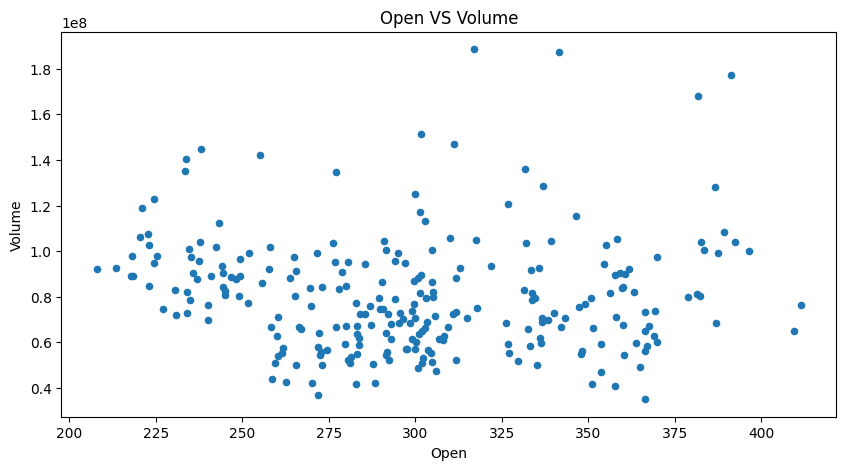

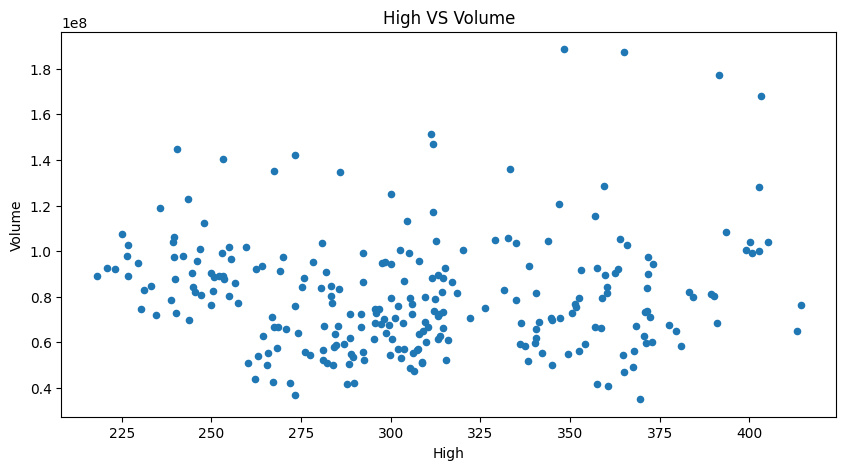

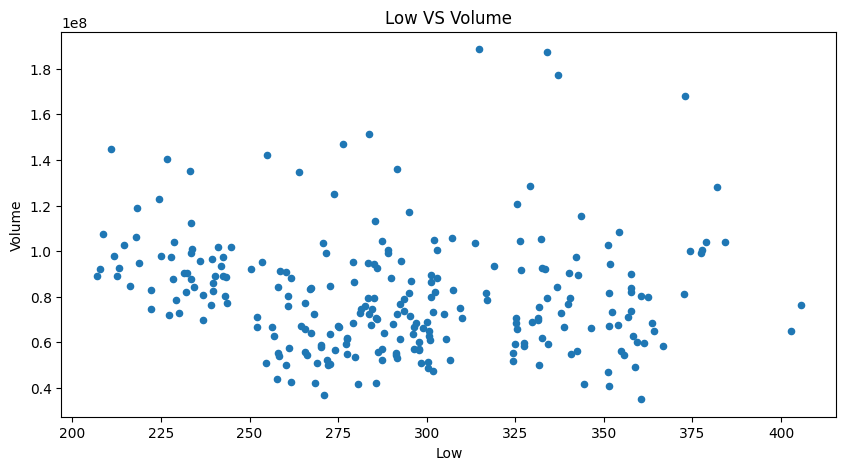

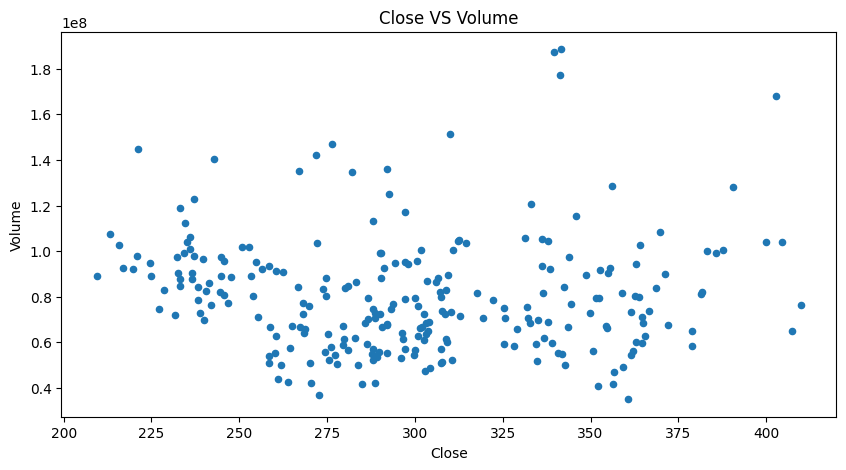

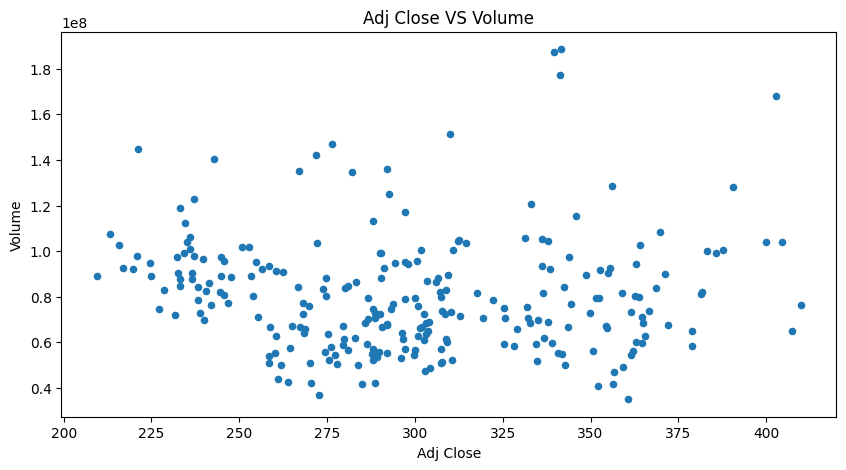

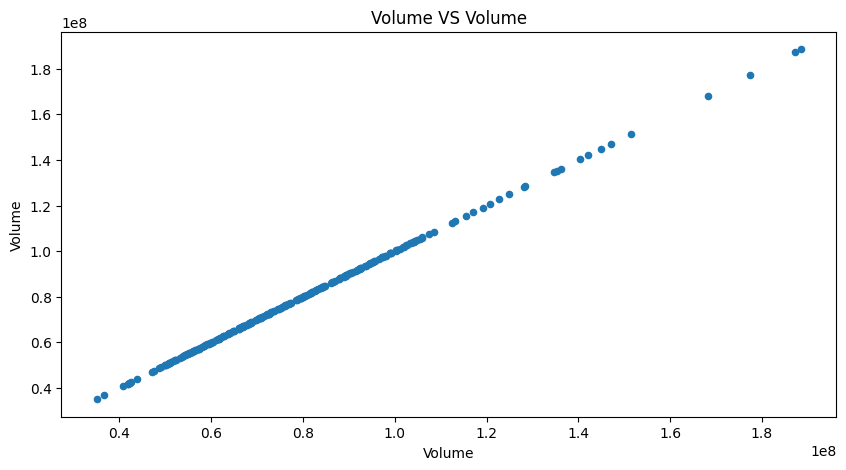

In [13]:
ContinuousCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    TeslaData.plot.scatter(x=predictor, y='Volume', figsize=(10,5), title=predictor+" VS "+ 'Volume')

## **Scatter charts interpretation**

---


* The situation where most of the graphs show an even distribution of dots with some having more dots on the left-hand side, indicating a decrease in the number of dots as the x-axis values rise, can be explained by the nature of the data relationship. This phenomenon suggests a negative correlation between the variables. As the x-axis values increase, the corresponding y-axis values tend to decrease, resulting in the distribution pattern observed.

* On the other hand, when the graph forms a direct proportional straight line, resembling a diagonal, it signifies a positive correlation between the variables. In this scenario, as the x-axis values increase, the y-axis values also increase consistently, resulting in a clear upward trend. This trend is indicative of a strong positive relationship between the variables, making it favorable for ML model development.

## **Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**
---

* Pearson's correlation coefficient serves as a robust measure for this purpose.
* It can be computed straightforwardly by dividing the covariance between two features \( x \) and \( y \) (numerator) by the product of their standard deviations (denominator).

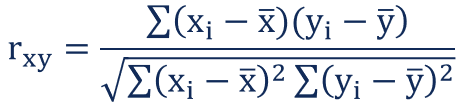

* This calculation is applicable only to numeric columns.
* A correlation between [-1,0) signifies an inverse relationship, where the scatter plot depicts a downward trend.
* A correlation between (0,1] indicates a direct relationship, with the scatter plot displaying an upward trend.
* A correlation close to {0} suggests no discernible relationship, and the scatter plot shows no clear trend.
* If the correlation value between two variables exceeds 0.5 in magnitude, it indicates a strong relationship, regardless of the sign.
* The correlations between the Target variable and all other predictor variables have been assessed to determine which columns/features/predictors are genuinely associated with the target variable under consideration.

In [14]:
# Calculating correlation matrix
ContinuousCols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Creating the correlation matrix
CorrelationData=TeslaData[ContinuousCols].corr()
CorrelationData

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.991269,0.986364,0.971783,0.971783,-0.047793
High,0.991269,1.000000,0.988299,0.986715,0.986715,0.008397
Low,0.986364,0.988299,1.000000,0.990137,0.990137,-0.104980
Close,0.971783,0.986715,0.990137,1.000000,1.000000,-0.047791
Adj Close,0.971783,0.986715,0.990137,1.000000,1.000000,-0.047791
Volume,-0.047793,0.008397,-0.104980,-0.047791,-0.047791,1.000000


In [15]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Volume'][abs(CorrelationData['Volume']) > 0.5 ]

Volume    1.0
Name: Volume, dtype: float64

## **Observations from Step 14**
---
* Final selected Continuous columns: volume

## **Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots**
---
* In scenarios where the target variable is Continuous and the predictor variable is Categorical, the relationship will be examined using Boxplots.
* Evaluate the strength of the relationship using an ANOVA test.

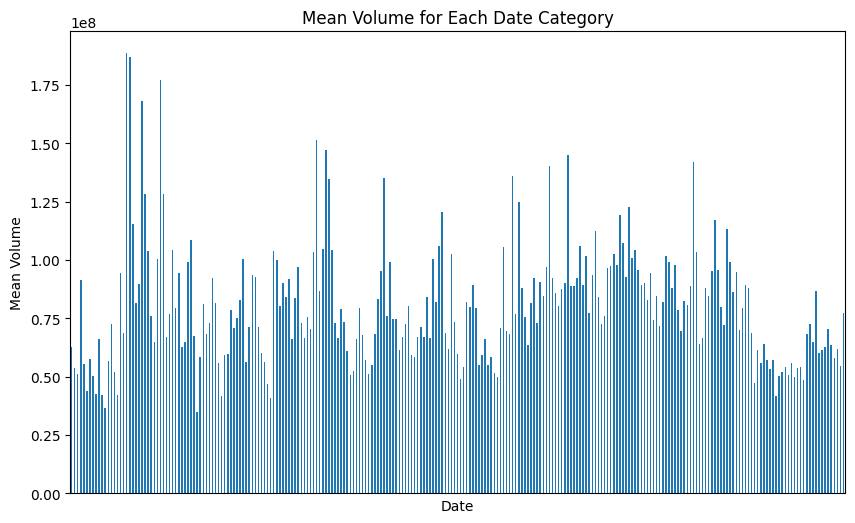

In [16]:
# Calculate the mean volume for each date category
mean_volume = TeslaData.groupby('Date')['Volume'].mean()

# Create a bar plot
mean_volume.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Mean Volume')
plt.title('Mean Volume for Each Date Category')
plt.xticks(rotation=45)
plt.xticks([])  # Hide x-axis labels
plt.show()



## **Observations from Step 15: Box-Plots interpretation**
---

- These plots illustrate how the continuous predictor variable changes across various categories, with the Y-axis representing its distribution and the X-axis depicting each category.

- When the distributions of the continuous variable appear similar for each category (aligned boxes), it likely indicates minimal influence on the target variable, suggesting a weak correlation.

- Conversely, if the distributions differ across categories (unaligned boxes), it suggests a potential correlation with the target variable.

- Within our dataset, both categorical predictors appear to exhibit correlations with the target variable.

## **Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**
---
- ANOVA (Analysis of Variance) assesses the relationship between a continuous variable and a categorical one. It compares means across multiple groups, akin to a t-test but applicable to more than two groups. ANOVA evaluates variation between data samples against variation within each sample. High between-group variance and low within-group variance suggest significant differences in group means.

- The Null Hypothesis (H0) assumes no association between variables, suggesting equal average values of the numeric Target variable across all groups of the categorical Predictor variable. In statistical hypothesis testing, rejecting the null hypothesis indicates statistically significant effects, supported by evidence from the sample.

- The ANOVA test outcome reflects the probability of the Null Hypothesis being true, indicating the likelihood of no relationship between the variables.

In [17]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [18]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Date']
FunctionAnova(inpData=TeslaData,
              TargetVariable='Volume',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Date is NOT correlated with Volume | P-Value: nan


[]

## **Observations from Step 16**
---

* The ANOVA results substantiate the earlier visual examination conducted via box plots.

* All categorical variables demonstrate correlation with the Target variable.

* This alignment can be anticipated by merely observing the box plots.

* The selected categorical column for further analysis is 'Date'.


## **Selecting final Predictors/Features for building Machine Learning/AI model.**
---

* After conducting thorough exploratory data analysis, the following parts will finalize the features/predictors/columns for machine learning model construction as:

* 'Open', 'High', 'Low', 'Close','Adj Close', and 'Volume'.


In [19]:
SelectedColumns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Selecting final columns
DataForML=TeslaData[SelectedColumns]
DataForML.head()

,Open,High,Low,Close,Adj Close,Volume
0,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [20]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## **Step 17: Data Pre-processing for Machine Learning Model Building or Model Development**
---

Below are the necessary steps to prepare predictor variables for machine learning:

1. Ordinal categorical columns are converted to numeric values.

2. Binary nominal categorical columns are transformed into numeric format using a 1/0 mapping.

3. All other nominal categorical columns are converted to numeric using the `pd.get_dummies()` function.

Data transformation is a critical process in modern organizations. By manipulating raw data, it becomes more meaningful and useful. This transformation enhances decision-making by providing valuable insights. Moreover, improved data quality ensures accuracy and reliability. Efficiently structured data streamlines operations, leading to faster reporting and better resource allocation.

## Converting the nominal variable to numeric using get_dummies()

In [21]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Volume']=TeslaData['Volume']

# Printing sample rows
DataForML_Numeric.head()

,Open,High,Low,Close,Adj Close,Volume
0,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


## **Step 18: Machine Learning Model Development:**
---

The data is divided into Training and Testing sets to facilitate model development and evaluation. Not all of the dataset is used for creating the model (training data). Instead, a portion is randomly reserved to evaluate the model's performance. This reserved portion is termed Testing Data, while the rest is designated as Training Data, utilized for constructing the model. Typically, around 70% of the data serves as Training Data, with the remaining 30% allocated for Testing Data.

In [22]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
#Separate Target Variable and Predictor Variables
TargetVariable='Volume'
Predictors=['Open', 'High', 'Low', 'Close', 'Adj Close']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## **Step 19: Standardization/Normalization of data**
---

* This step compares the resulting accuracy of this transformation with the accuracy of raw data.

In [24]:
#Sandardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177, 5)
(177,)
(76, 5)
(76,)


## **Step 20: Multiple Linear Regression Algorithm For ML/AI model building**

In [26]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Volume']-TestingDataResults['PredictedVolume']))/TestingDataResults['Volume'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.5851084173368784

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low     Close  Adj Close     Volume  \
0  0.354347  0.332412  0.331690  0.356527   0.356527   84723000   
1  0.264691  0.256255  0.272974  0.274948   0.274948   57587400   
2  0.610079  0.594722  0.536408  0.524703   0.524703  103416000   
3  0.335446  0.319623  0.321194  0.313369   0.313369  103472700   
4  0.339262  0.374985  0.343963  0.404553   0.404553   66582900   

   PredictedVolume  
0       69310340.0  
1       64850683.0  
2       85452304.0  
3       68297088.0  
4       89649705.0  
Mean Accuracy on test data: 83.84414827130172
Median Accuracy on test data: 85.9444749643252

Accuracy values for 10-fold Cross Validation:
 [75.19487874 80.00620059 86.77539498 81.18814358 82.67240861 83.59736515
 89.0585953  84.69514173 85.55032847 73.05492047]

Final Average Accuracy of the model: 82.18


## **Step 21: AdaBoost Algorithm For ML/AI model building**

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.46335229031820246

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low     Close  Adj Close     Volume  \
0  0.354347  0.332412  0.331690  0.356527   0.356527   84723000   
1  0.264691  0.256255  0.272974  0.274948   0.274948   57587400   
2  0.610079  0.594722  0.536408  0.524703   0.524703  103416000   
3  0.335446  0.319623  0.321194  0.313369   0.313369  103472700   
4  0.339262  0.374985  0.343963  0.404553   0.404553   66582900   

   PredictedVolume  
0       69058405.0  
1       70685182.0  
2       77131692.0  
3       69058405.0  
4       70685182.0  
Mean Accuracy on test data: 78.67371384516949
Median Accuracy on test data: 82.43951363726515

Accuracy values for 10-fold Cross Validation:
 [54.61071865 68.57727495 81.39082537 72.5057372  81.28244636 72.1302134
 87.49414385 88.43980831 79.91430912 59.0

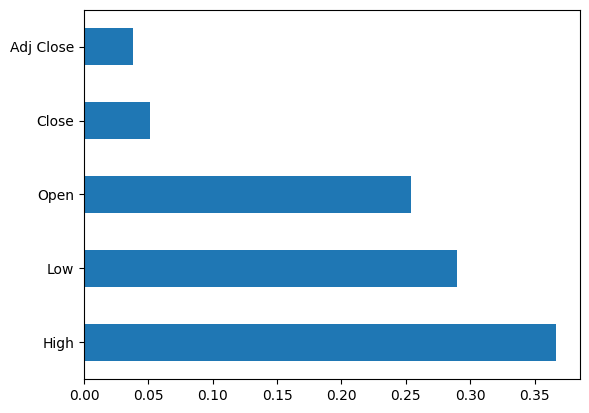

In [27]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Volume']-TestingDataResults['PredictedVolume']))/TestingDataResults['Volume'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9948458358933797

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low     Close  Adj Close     Volume  \
0  0.354347  0.332412  0.331690  0.356527   0.356527   84723000   
1  0.264691  0.256255  0

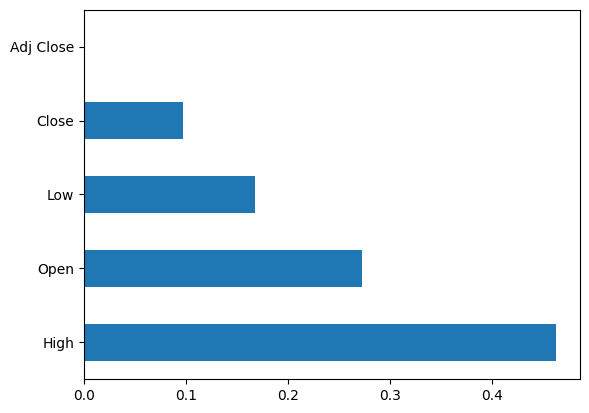

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Volume']-TestingDataResults['PredictedVolume']))/TestingDataResults['Volume'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

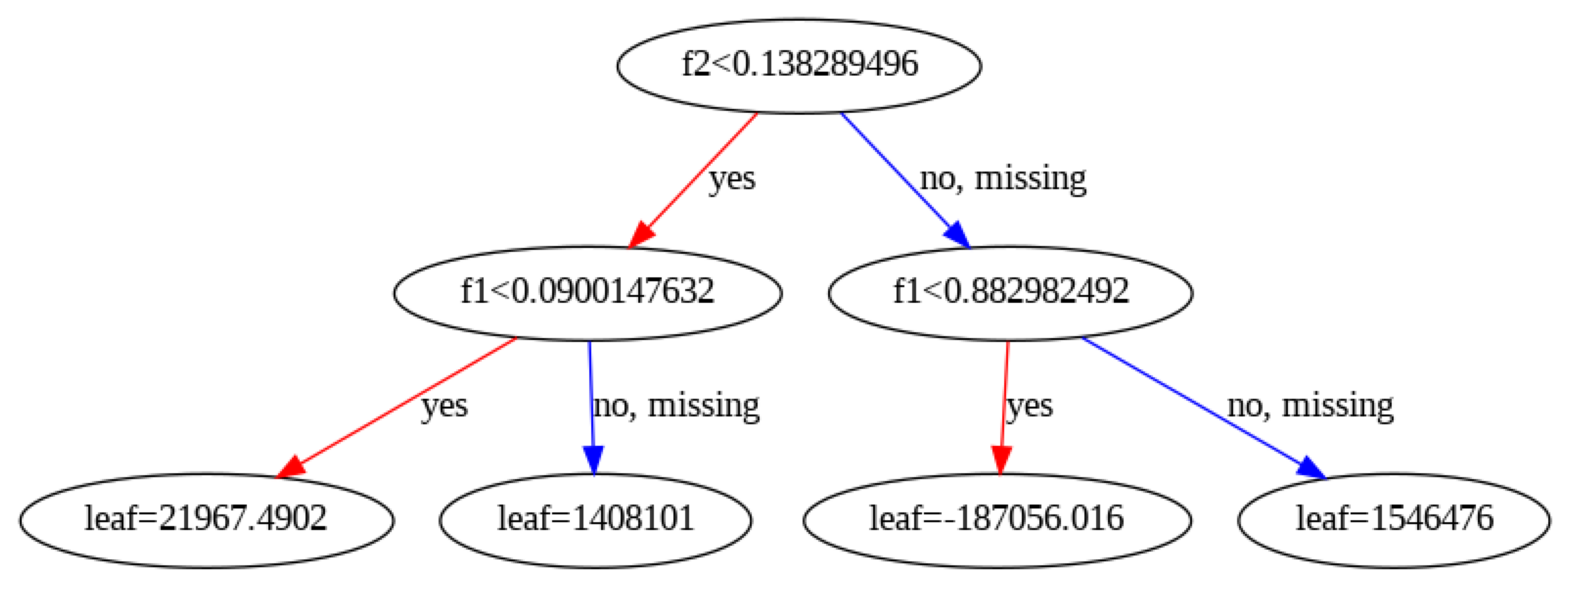

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Volume']-TestingDataResults['PredictedVolume']))/TestingDataResults['Volume'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.5974301408464373

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low     Close  Adj Close     Volume  \
0  0.354347  0.332412  0.331690  0.356527   0.356527   84723000   
1  0.264691  0.256255  0.272974  0.274948   0.274948   57587400   
2  0.610079  0.594722  0.536408  0.524703   0.524703  103416000   
3  0.335446  0.319623  0.321194  0.313369   0.313369  103472700   
4  0.339262  0.374985  0.343963  0.404553   0.404553   66582900   

   PredictedVolume  
0       59679233.0  
1       61422200.0  
2       80940000.0  
3       64039067.0  
4       61839567.0  
Mean Accuracy on test data: 81.81498834912742
Median Accuracy on test data: 84.37795141576235

Accuracy values for 10-fold Cross Validation:
 [63.63720658 70.73920463 82.89290391 78.41693365 83.01666803 72.87440146
 86.08533292 88.60443925 79.37094662 69.68854275]

Final Average Accuracy of the model: 77.53
